# Pharmaceutical Data for Tumors in Mice

## Observations and Insights 

#### Looking at the line graph below labeled “Tumor Volume of Mouse S185 over Time using Capomulin” we can observe that there is a distinctive negative trend which means that the tumor volume for Mouse S185 was decreasing over time while the mouse was being treated with Capomulin. That’s a very promising sign for that drug, and we would need to evaluate the rest of the mice to see if it is consistently working the same on the other mice. 

#### Looking at the scatter plot labeled “Average Tumor Volume vs Mouse Weight for Capomulin Regiment” we can observe that there is a positive trend over the mouse weight. The heavier the mouse, the larger the average tumor volume. Looking to same scatter plot with the regression line, there is a very strong correlation (r-value of 0.84) between the mouse weight and tumor volume.  

#### Looking at the box plot labeled “Final Tumor Volume of Each Mouse Across Four Regimens”, we can see that Capomulin and Ramicane have much lower tumor volumes than the other two drugs (Ceftamin and Infubinol). Capomulin and Ramicane appear to be working better than the other two since the majority of the final tumor volume is close to 40 or below while the other to are closer to 50 and above. 

### Setup

In [1]:
#setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

#import data from csv files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#read in csv files
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
#display mouse data
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#display results data
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#merging the two dataframes by mouse ID
mouse_results_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#count the number of individual mice
mouse_count = len(mouse_results_df["Mouse ID"].unique())
print(f"The number of mouse in the data set is {mouse_count}")

The number of mouse in the data set is 249


In [6]:
#finding duplicate entries for timepoints for the same mouse
mouse_duplicates = mouse_results_df.loc[mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(f"This Mouse ID has duplicated entries: {mouse_duplicates}")

This Mouse ID has duplicated entries: ['g989']


In [7]:
#data for duplicate mouse ID, returns 13 results of data
mouse_results_df.loc[mouse_results_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


### Data Frame without duplicated entries

In [8]:
# drop all data for the duplicate mouse
mouse_results_cleaned_df = mouse_results_df.loc[mouse_results_df["Mouse ID"]!="g989"]
mouse_results_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Number of mice in the current Data Frame

In [9]:
# counting number of mice in new data frame, should be one less
mouse_count2 = mouse_results_cleaned_df["Mouse ID"].nunique()
print(f"The number of mice in the date frame is {mouse_count2}")

The number of mice in the date frame is 248


## Summary Statistics

In [10]:
# summary statistics table of mean, median, variance, standard deviation, and SEM for the tumor volume for each regimen
# using groupby function for the drug regimen
regimen_group = mouse_results_cleaned_df.groupby("Drug Regimen")

#calculate for the tumor volume 
mean = regimen_group["Tumor Volume (mm3)"].mean() 
median = regimen_group["Tumor Volume (mm3)"].median()
variance = regimen_group["Tumor Volume (mm3)"].var()
standard_dev = regimen_group["Tumor Volume (mm3)"].std()
sem = regimen_group["Tumor Volume (mm3)"].sem()

#building data frame for the data
summary_df = pd.DataFrame({"Tumor Volume Mean":mean, 
                           "Tumor Volume Median": median, 
                           "Tumor Volume Variance": variance,
                           "Tumor Volume Standard Dev.": standard_dev,
                           "Tumor Volume SEM": sem})
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# summary statistics table of mean, median, variance, standard deviation, and SEM for the tumor volume for each regimen
# using aggregation method to calculate all at once

summary2_df = regimen_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary2_df = summary2_df.rename(columns={"mean":"Mean",
                                        "median": "Median",
                                        "var": "Variance",
                                        "std": "Standard Dev.",
                                        "sem": "SEM"})
summary2_df


Tumor Volume (mm3)                                              
                           Mean     Median   Variance Standard Dev.       SEM
Drug Regimen                                                                 
Capomulin             40.675741  41.557809  24.947764      4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177      6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684      6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577      8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479      8.134708  0.596466
Placebo               54.033581  52.288934  61.168083      7.821003  0.581331
Propriva              52.320930  50.446266  43.852013      6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704      4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562      7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355      6.966589  0.516398

## Bar and Pie Charts

### Bar Charts for Total Number of Measurements Per Regimen

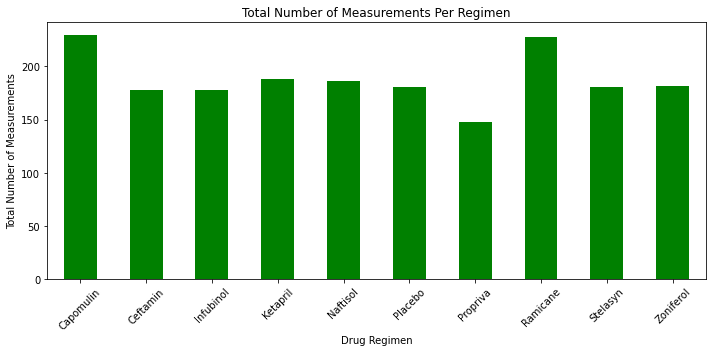

In [12]:
# bar chart using pandas for the total number of measurements taken on each drug regimen
#get sum of measurements for each drug
drug_sum = regimen_group.count()["Mouse ID"]

drug_bar = drug_sum.plot(kind="bar", figsize=(10,5), rot=45, color = "green", x = "Drug Regimen")
drug_bar.set_ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements Per Regimen")
plt.tight_layout()

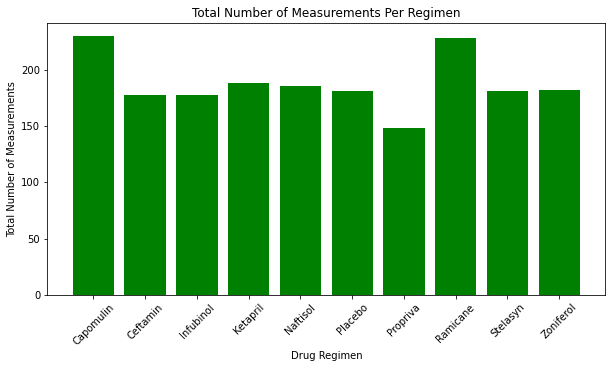

In [13]:
# bar chart using pyplot for the total number of measurements taken on each drug regimen
plt.figure(figsize = (10,5))
plt.bar(drug_sum.index.values, drug_sum.values, color="green")
plt.xticks(rotation=45)
plt.title("Total Number of Measurements Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

### Pie Charts for Male vs Female Distribution of Mice

In [14]:
# pie plot using pandas showing male vs female distribution
#get the gender breakdown
gender_sum = mouse_results_cleaned_df.groupby("Sex")
gender_sum = gender_sum.count()["Mouse ID"]
gender_sum

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Sex of Mice')

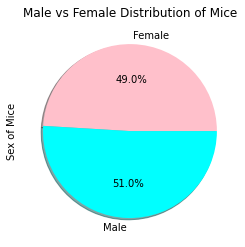

In [15]:
# pie plot using pandas showing  male vs female distribution
gender_pie = gender_sum.plot(kind="pie", title = "Male vs Female Distribution of Mice",
                             autopct="%1.1f%%", colors = ["pink", "cyan"], shadow=True)
gender_pie.set_ylabel("Sex of Mice")


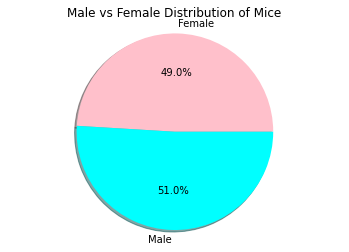

In [16]:
# pie plot using pyplot showing male vs female distribution
colors = ["pink", "cyan"]
plt.title("Male vs Female Distribution of Mice")
plt.pie(gender_sum.values, labels = gender_sum.index.values, colors = colors, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()

## Quartiles, Outliers, and Boxplots

In [17]:
#calculate final tumor volume for each mouse
final_tumor_df = mouse_results_cleaned_df.groupby("Mouse ID").last()[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a262,Placebo,45,70.717621
a275,Ceftamin,45,62.999356
a366,Stelasyn,30,63.440686
...,...,...,...
z435,Propriva,10,48.710661
z578,Ramicane,45,30.638696
z581,Infubinol,45,62.754451


In [18]:
#only pick mice with specific drugs: capomulin, ramicane, infubinol, ceftamin
#the tumor column has all of my final data
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"].isin(drugs)]
final_tumor_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,31.896238
y865,Ceftamin,45,64.729837


In [19]:
#calculate quartiles and IQR
for drug in drugs:
    filterdf = final_tumor_df.loc[final_tumor_df["Drug Regimen"]==drug]
    #print(drug)
    tumor_list = filterdf["Tumor Volume (mm3)"]
    quartiles = tumor_list.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    inter_q = upper_q - lower_q
    lowerbound = lower_q - (1.5*inter_q)
    upperbound = upper_q + (1.5*inter_q)
    outliers = tumor_list.loc[(tumor_list > upperbound)|(tumor_list < lowerbound)]
    print(f"For drug: {drug} the Lower Quartile is {lower_q}") 
    print(f"For drug: {drug} the Upper Quartile is {upper_q}") 
    print(f"For drug: {drug} the Interquartile Range is{inter_q}")
    print(f"For drug: {drug} the Lower Bound is {lower_q}")
    print(f"For drug: {drug} the Upper Bound is {upper_q}")
    print(f"For drug: {drug} if there are Outliers they are: {outliers}")

For drug: Capomulin the Lower Quartile is 32.37735684
For drug: Capomulin the Upper Quartile is 40.1592203
For drug: Capomulin the Interquartile Range is7.781863460000004
For drug: Capomulin the Lower Bound is 32.37735684
For drug: Capomulin the Upper Bound is 40.1592203
For drug: Capomulin if there are Outliers they are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For drug: Ramicane the Lower Quartile is 31.56046955
For drug: Ramicane the Upper Quartile is 40.65900627
For drug: Ramicane the Interquartile Range is9.098536719999998
For drug: Ramicane the Lower Bound is 31.56046955
For drug: Ramicane the Upper Bound is 40.65900627
For drug: Ramicane if there are Outliers they are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For drug: Infubinol the Lower Quartile is 54.04860769
For drug: Infubinol the Upper Quartile is 65.52574285
For drug: Infubinol the Interquartile Range is11.477135160000003
For drug: Infubinol the Lower Bound is 54.04860769
For drug: Infubinol the Up

Text(0, 0.5, 'Tumor Volume')

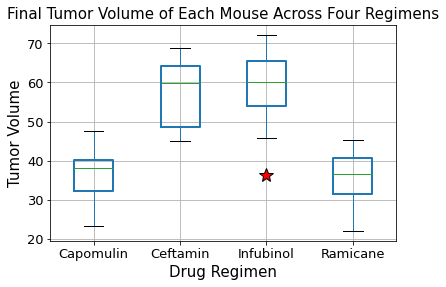

In [20]:
#box plot for final tumor volume for all mice over all 4 regiments
#change marker type and layout
outlier_layout = dict(marker='*', markerfacecolor='r', markersize=15)
box_layout = dict(linewidth=2)
#plot box
tumor_boxplot = final_tumor_df.boxplot(by = "Drug Regimen", column = "Tumor Volume (mm3)", fontsize=13,
                                       flierprops=outlier_layout, boxprops=box_layout)
#remove suptitle for readability
tumor_boxplot.get_figure().suptitle("")
tumor_boxplot.set_title("Final Tumor Volume of Each Mouse Across Four Regimens", fontsize=15)
tumor_boxplot.set_xlabel("Drug Regimen", fontsize=15)
tumor_boxplot.set_ylabel("Tumor Volume", fontsize=15)

## Line and Scatter Plots

In [21]:
#Get information on just the drug regimen of Capomulin
capomulin = ["Capomulin"]
capomulin_data_df = mouse_results_cleaned_df.loc[mouse_results_cleaned_df["Drug Regimen"].isin(capomulin)]
capomulin_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


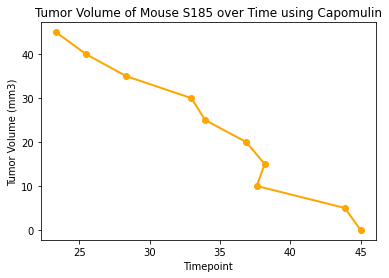

In [22]:
#line plot for single mouse treated with Capomulin
s185_data = pd.DataFrame(capomulin_data_df.loc[capomulin_data_df['Mouse ID'] == 's185' ])

x_axis = s185_data["Tumor Volume (mm3)"]
y_axis = s185_data["Timepoint"]
plt.title("Tumor Volume of Mouse S185 over Time using Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, marker="o", color="orange", linewidth=2)
plt.show()

In [23]:
#calculate the average tumor size and make a new data frame to plot
mouse_weight_tumor = pd.DataFrame()
mouse = capomulin_data_df.groupby("Mouse ID")
for name,group in mouse:
    mouse_data = {"Mouse ID":name,"Mean Tumor Size":group["Tumor Volume (mm3)"].mean(), "Weight (g)":group["Weight (g)"].mean()}
    mouse_weight_tumor = mouse_weight_tumor.append(mouse_data, ignore_index = True)

mouse_weight_tumor=mouse_weight_tumor.set_index("Mouse ID")
mouse_weight_tumor.head()

,Mean Tumor Size,Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0


<function matplotlib.pyplot.show>

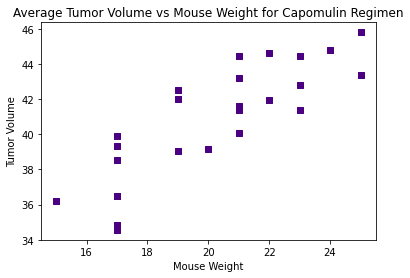

In [24]:
#scatter plot for the average tumor volume vs mouse weight for mice with capomulin regimen
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
x_values = mouse_weight_tumor["Weight (g)"]
y_values = mouse_weight_tumor["Mean Tumor Size"]
plt.scatter(x_values, y_values, marker="s", color = "indigo")
plt.show

## Correlation and Regression

LinregressResult(slope=0.9544396890241051, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201326)


Text(20, 35, 'y = 0.95x + 21.55')

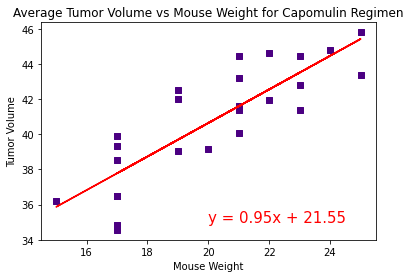

In [25]:
#calculate the correlation coefficient and linear regression
#same graph data
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
x_values = mouse_weight_tumor["Weight (g)"]
y_values = mouse_weight_tumor["Mean Tumor Size"]
plt.scatter(x_values, y_values, marker="s", color = "indigo")
plt.show

#new calculations and adding line equation to graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(linregress(x_values, y_values))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")


#### Correlation Coefficient and line expression

In [26]:
#Using the above data get the correlation coefficient and linear regression line equation
print(f"The correlation coefficient is {rvalue} and the line expression for the linear regression model is {line_eq}")

The correlation coefficient is 0.8419363424694721 and the line expression for the linear regression model is y = 0.95x + 21.55


#### We can see from the rvalue(correlation coefficient) that there is a very strong correlation